Analysis of Fandango's Movie Ratings Data (Post-2015)

This project will be used to analyze Fandango's movie ratings data for the most popular films released in 2016 and 2017. Presumably, they have fixed the bug they reported had caused a discrepancy between actual and presented ratings discovered by Walt Hickey in October 2015. The purpose of this project is to determine whether Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 shows any difference.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [62]:
oldMovieRatings = pd.read_csv('fandango_score_comparison.csv')
newMovieRatings = pd.read_csv('movie_ratings_16_17.csv')

In [63]:
old = oldMovieRatings[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
new = newMovieRatings[['movie', 'year', 'fandango']].copy()
## make copies to avoid 'setting with copy' warnings

Population of interest: find difference between Fandango's ratings for 2016 and 2017 films and the ratings from other movie rating critics and companies, and see if this difference is comparable to the one previously observed in 2015.

The fandango_score_comparison.csv data was not randomly selected; they took all movies that had the data they needed into their dataset.

The movie_ratings_16_17.csv data is not randomly selected; they took 214 of the most popular movies released during 2016 and 2017, and that had a significant number of votes.

In [64]:
votesOld = old['Fandango_votes'].value_counts().sort_index() * 100
print(votesOld.loc[:30].sum())
## no movies in the "old" dataset have less than 30 fan ratings

0


The ReadMe file for 2016-2017 dataset uses movies with 'a significant number of user ratings. Since it doesn't say what significant means, I will randomly sample 20 movies from this dataset and check how many ratings they have online. The rating number may have changed since this dataset was created, though.

In [65]:
print(new['movie'].sample(20, random_state=1))

108                              Mechanic: Resurrection
206                                            Warcraft
106                                           Max Steel
107                                       Me Before You
51              Fantastic Beasts and Where to Find Them
33                                                 Cell
59                                               Genius
152                                               Sully
4                               A Hologram for the King
31                           Captain America: Civil War
118                                          Mr. Church
39     Crouching Tiger, Hidden Dragon: Sword of Destiny
93                                      Kung Fu Panda 3
69                                       Hidden Figures
161                             The Autopsy of Jane Doe
112                                          Misconduct
94                                           La La Land
97                                        Live b

In [66]:
##'''
#108                              Mechanic: Resurrection   2251
#206                                            Warcraft   7281
#106                                           Max Steel   494
#107                                       Me Before You   5272
#51              Fantastic Beasts and Where to Find Them   13494
#33                                                 Cell   18
#59                                               Genius   127
#152                                               Sully   11890
#4                               A Hologram for the King   501
#31                           Captain America: Civil War   35159
#118                                          Mr. Church   183
#39     Crouching Tiger, Hidden Dragon: Sword of Destiny   45
#93                                      Kung Fu Panda 3   5874
#69                                       Hidden Figures   11793
#161                             The Autopsy of Jane Doe   41
#112                                          Misconduct   23
#94                                           La La Land   9318
#97                                        Live by Night   923
#151                                       Suicide Squad   39443
#38                                             Criminal   1998
##'''
## Only 10% of the movies in this sample have less than 30 fan ratings
## Since most have 30+, we should be okay

In [67]:
movies2015 = old.copy()
movies2016 = new[new['year'] == 2016]

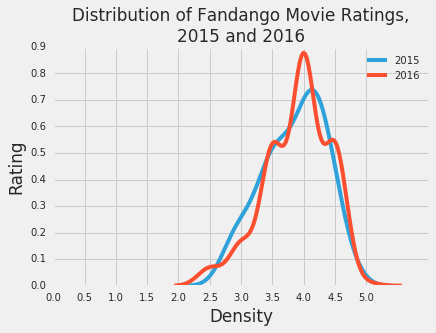

In [68]:
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.kdeplot(movies2015['Fandango_Ratingvalue'], label='2015', legend=True)
sns.kdeplot(movies2016['fandango'], label='2016', legend=True)
plt.title('Distribution of Fandango Movie Ratings,\n2015 and 2016', fontsize='large')
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel('Density')
plt.ylabel('Rating')
plt.show()



In [69]:
movies2015['Fandango_Ratingvalue'].value_counts().sort_index().sum()
# 146 values; has ~3/4 the values movies 2016 has

## create bins for each 1/2 star
intervals = pd.interval_range(start=2.5, end=5.0, freq=0.5)
fandango2015 = pd.Series([0,0,0,0,0], index=intervals)

for value in movies2015['Fandango_Ratingvalue']:
    for interval in intervals:
        if value in interval:
            fandango2015.loc[interval] += 1
            break
            
print(fandango2015)
print(fandango2015.sum())

(2.5, 3.0]    13
(3.0, 3.5]    30
(3.5, 4.0]    41
(4.0, 4.5]    55
(4.5, 5.0]     7
dtype: int64
146


In [70]:
movies2016['fandango'].value_counts().sort_index().sum()
# 191 values; has ~1 1/2 x the values movies2015 has
movies2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

Because movies2015 has ~ 3/4 the amount of values movies2016 has, relative frequencies would be more useful to compare.

In [71]:
fandango2015Percent = fandango2015 * 100 / (sum(fandango2015))
fandango2016Percent = movies2016['fandango'].value_counts(normalize=True).sort_index() * 100
print(fandango2015Percent)
print(fandango2016Percent)

(2.5, 3.0]     8.904110
(3.0, 3.5]    20.547945
(3.5, 4.0]    28.082192
(4.0, 4.5]    37.671233
(4.5, 5.0]     4.794521
dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


The frequency tables suggest that the 2016 ratings shifted left (down) but it is not as easy to see as in the kde. It also shows that there are fewer movies ranked at the very lowest and highest ends of the scale.

In [74]:
mean2015 = movies2015['Fandango_Ratingvalue'].mean()
median2015 = movies2015['Fandango_Ratingvalue'].median()
mode2015 = movies2015['Fandango_Ratingvalue'].mode()

mean2016 = movies2016['fandango'].mean()
median2016 = movies2016['fandango'].median()
mode2016 = movies2016['fandango'].mode()

print(mean2015, median2015, mode2015)
print(mean2016, median2016, mode2016)

statsDict = {'mean': [mean2015, mean2016], 'median': [median2015, median2016], 'mode': [mode2015, mode2016]}
summaryStats = pd.DataFrame(data= statsDict)
summaryStats
mode2015

3.8452054794520545 3.9 0    4.1
dtype: float64
3.887434554973822 4.0 0    4.0
dtype: float64


0    4.1
dtype: float64

In [73]:
#sns.catplot(x= columns, y = )